In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('election2024.csv')

In [ ]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
df.drop('id',inplace=True,axis=1)

In [ ]:
df.shape

(1600, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             692 non-null    object 
 13  company_type         879 non-null    object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), object(13)
memory usage

In [ ]:
df.isnull().sum()

,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0
education,0


In [ ]:
df['job_type'].unique()

array([nan, 'commercial organization', 'law enforcement agency',
       'government agency', 'government, management, judicial bodies',
       'non-profit agency', 'hard to say'], dtype=object)

In [ ]:
df['job_type'].mode()

,job_type
0,commercial organization


In [ ]:
df['job_type'].fillna(df['job_type'].mode()[0],inplace=True)

In [ ]:
df['company_type'].unique()

array(['farming', 'trade', 'law enforcement agency', nan,
       'tech, programming, communications', 'refused to answer',
       'industry, manufacturing', 'other',
       'housing and communal services', 'finances', 'education',
       'healthcare', 'state administration', 'culture, sports',
       'transportation, storage',
       'Сфера услуг, сервиса, бытового обслуживания Включает в том числе: Прачечная/химчистка, ремонт мебели, часов, ювелирны...',
       'catering, restaurants', 'construction, architecture',
       'hard to say', 'entertainment, tourism', 'social services',
       'media'], dtype=object)

In [ ]:
df['company_type'].mode()

,company_type
0,"industry, manufacturing"


In [ ]:
df.fillna(df['company_type'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

,0
sex,0
age,0
federal_district,0
type_of_city,0
knows_election_date,0
will_vote,0
candidate,0
television_usage,0
internet_usage,0
education,0


In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
for col in df.columns:
    print(f"The unique values in {col} are {df[col].unique()}")

The unique values in sex are ['male' 'female']
The unique values in age are [18. 23. 20. 22. 21. 27. 37. 43. 39. 36. 49. 60. 44. 61. 67. 29. 47. 32.
 45. 35. 53. 71. 54. 55. 48. 66. 56. 68. 69. 33. 76. 77. 70. 86. 90. 75.
 80. 24. 19. 25. 28. 31. 26. 30. 38. 40. 41. 52. 50. 51. 46. 63. 34. 42.
 65. 73. 74. 72. 59. 57. 58. 78. 79. 62. 64. 82. 84. 85. 87. 83. 81.]
The unique values in federal_district are ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
The unique values in type_of_city are ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
The unique values in knows_election_date are ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
The unique values in will_vote are ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'str

In [ ]:
cat_cols=df.select_dtypes(include='object').columns
cat_cols
num_cols=df.select_dtypes(exclude='object').columns
num_cols

Index(['age', 'weight1'], dtype='object')

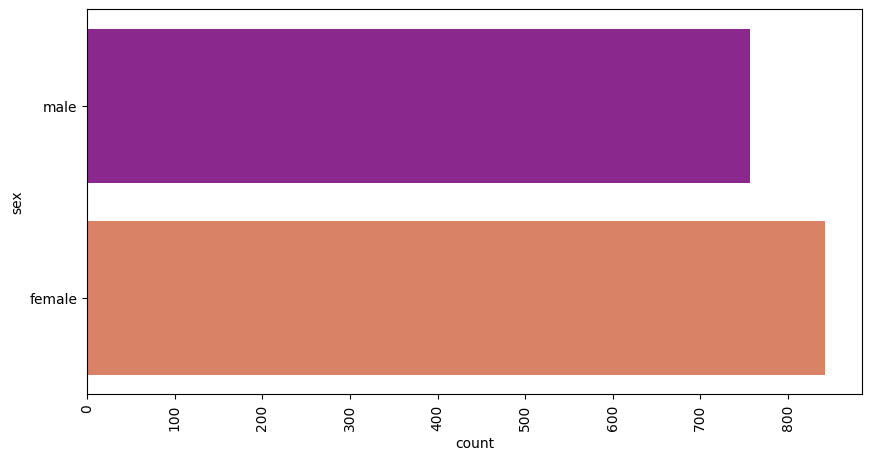

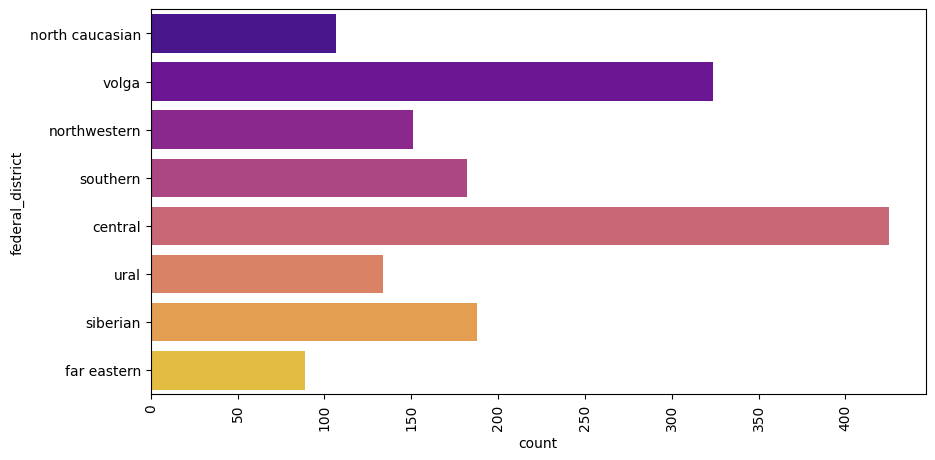

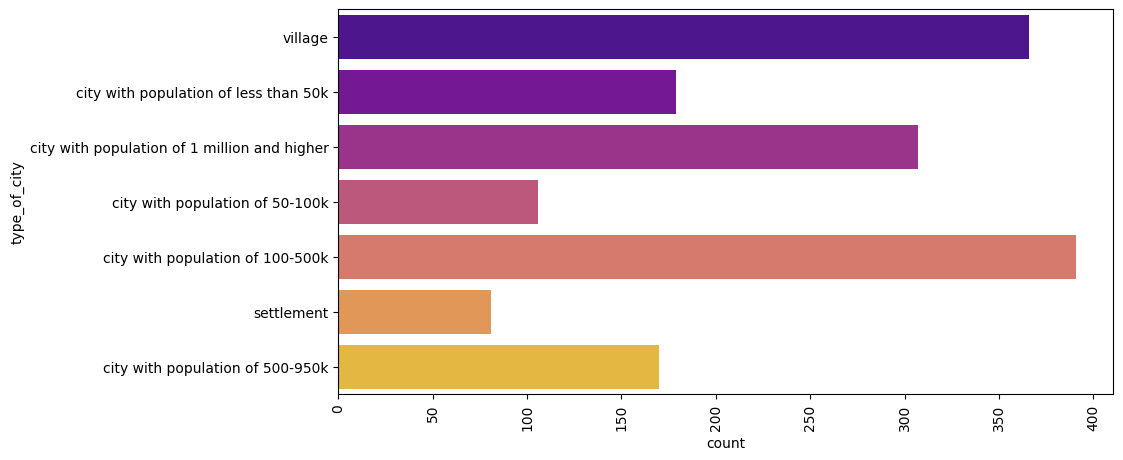

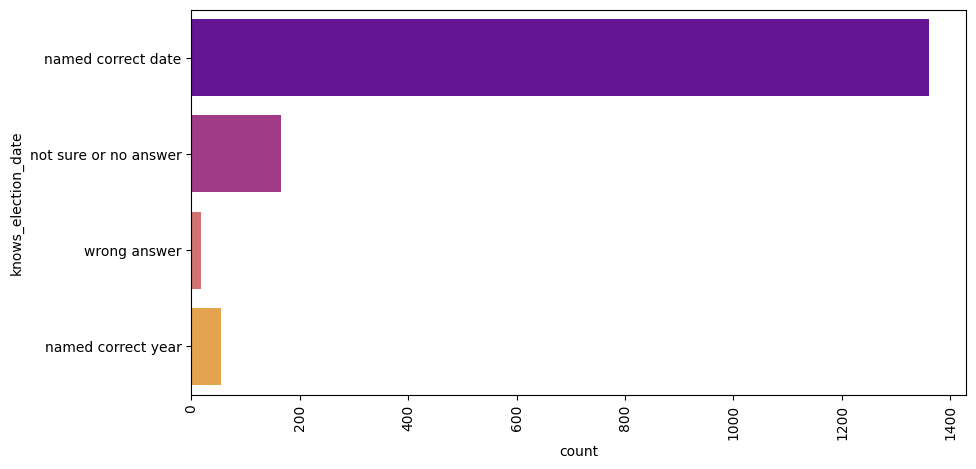

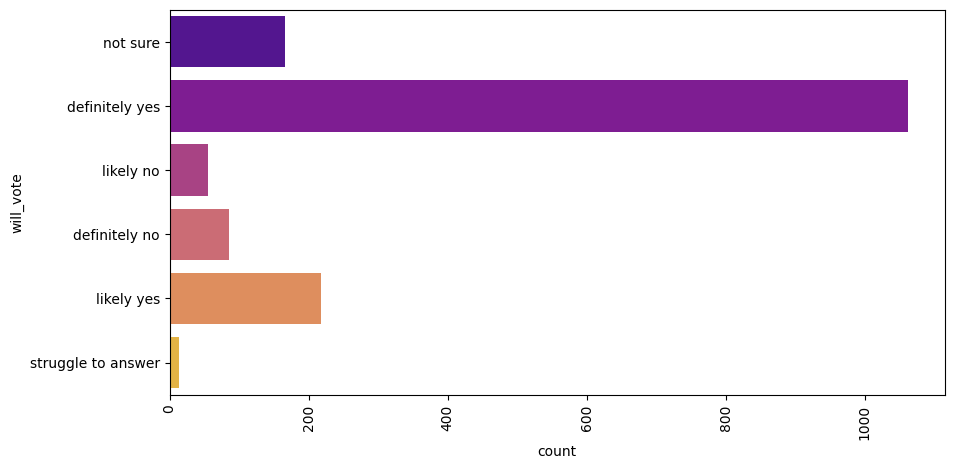

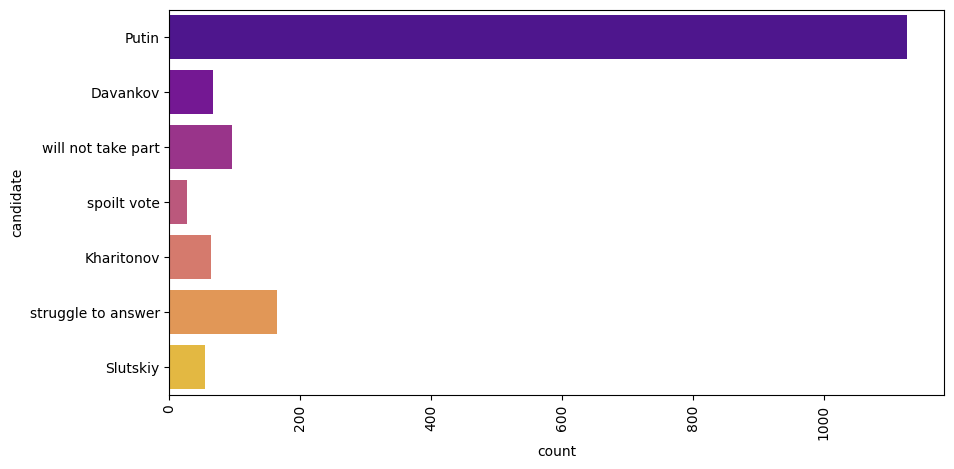

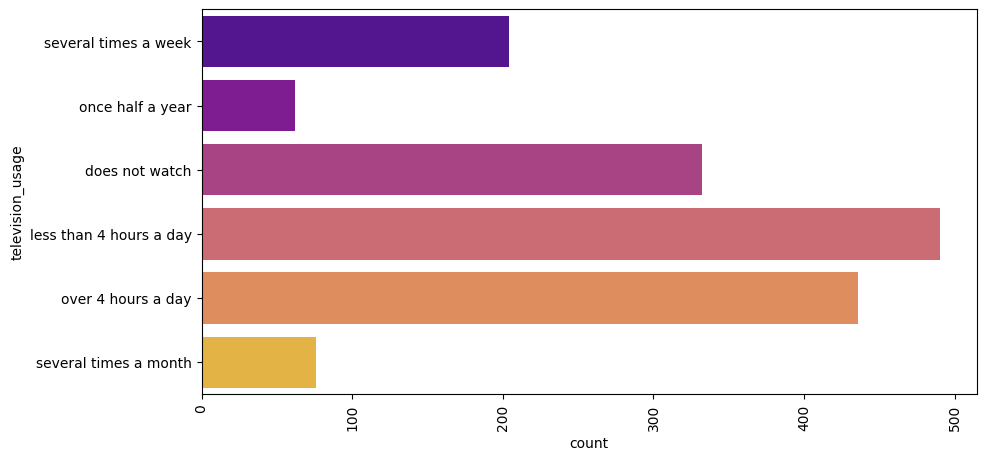

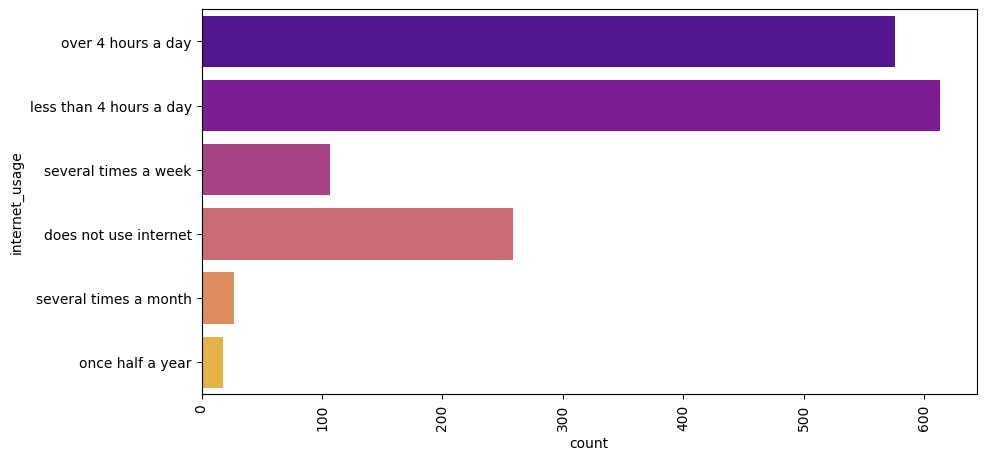

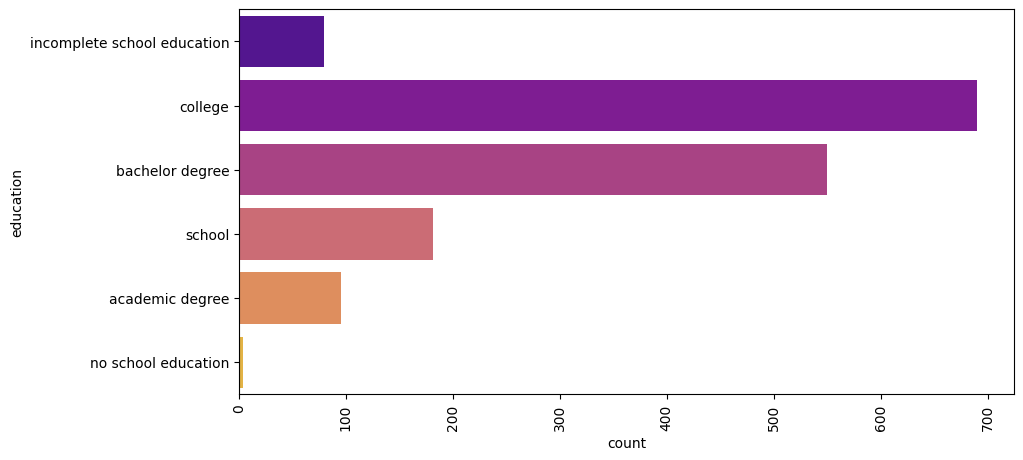

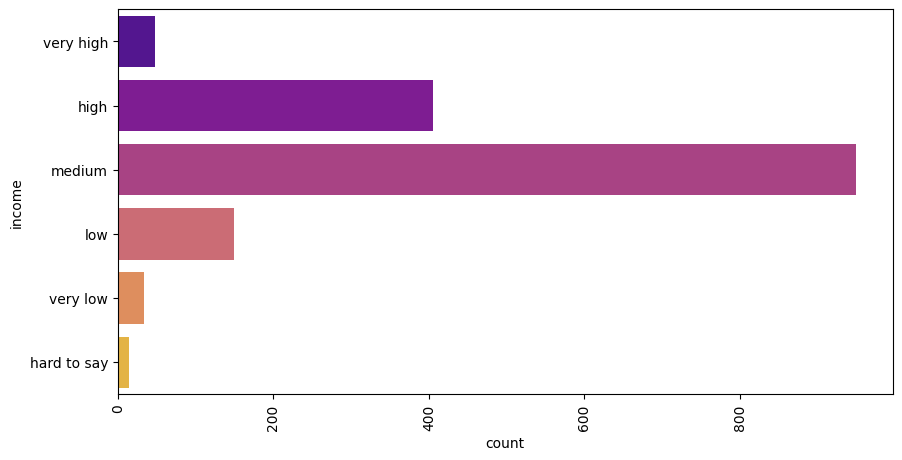

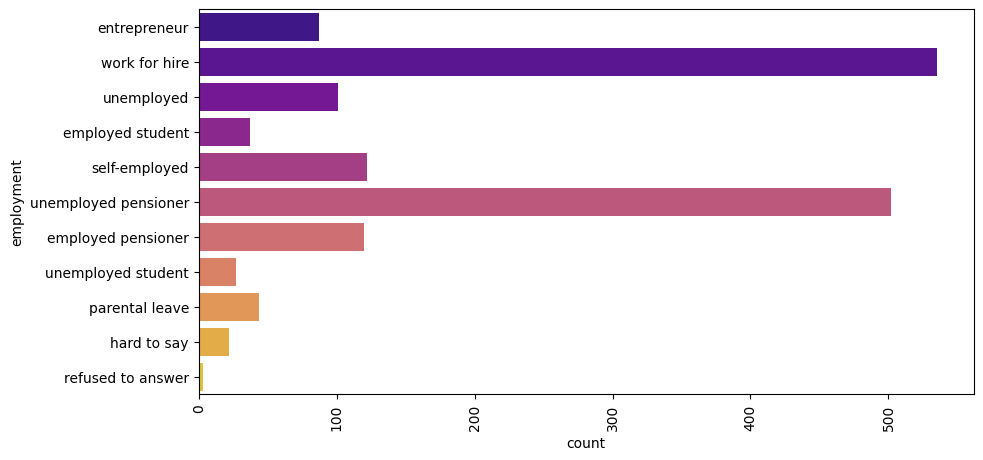

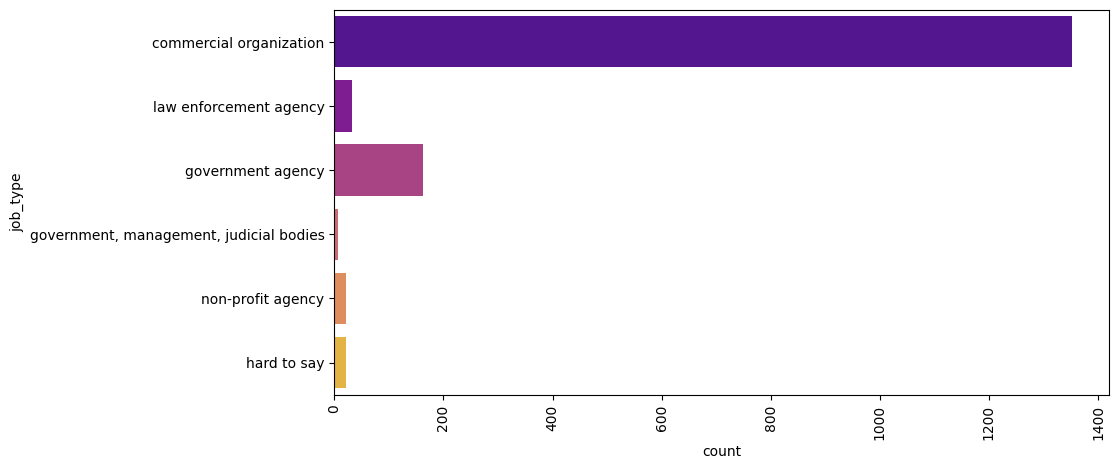

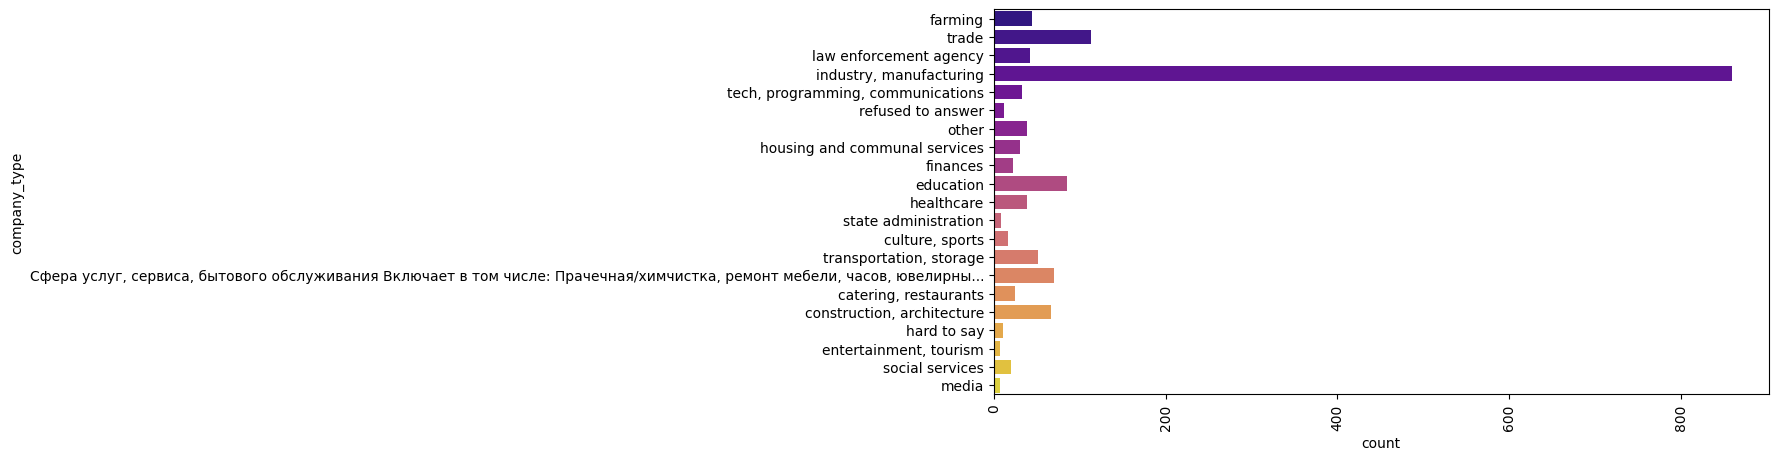

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(df[col],palette='plasma')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
num_cols

Index(['age', 'weight1'], dtype='object')

In [ ]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

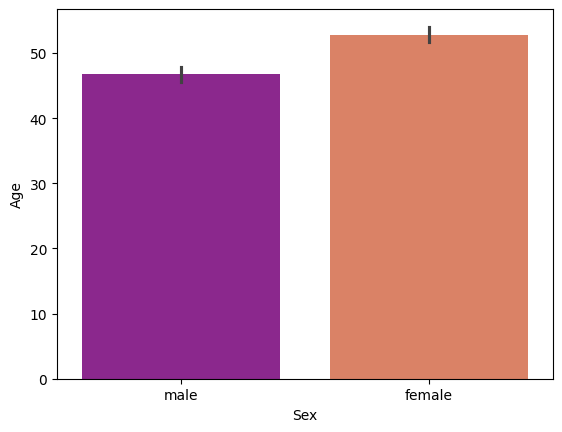

In [ ]:
sns.barplot(x='sex',y='age',data=df,palette='plasma')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

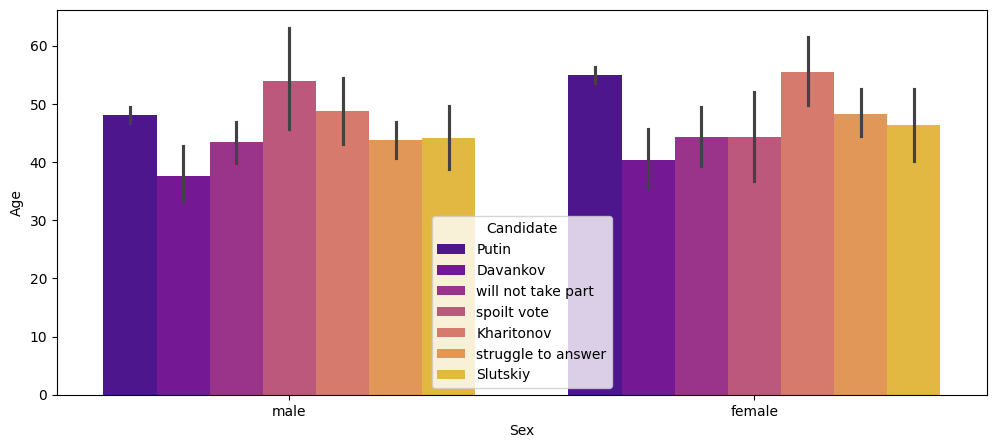

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='sex',y='age',hue='candidate',data=df,palette='plasma')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.legend(title='Candidate')
plt.show()

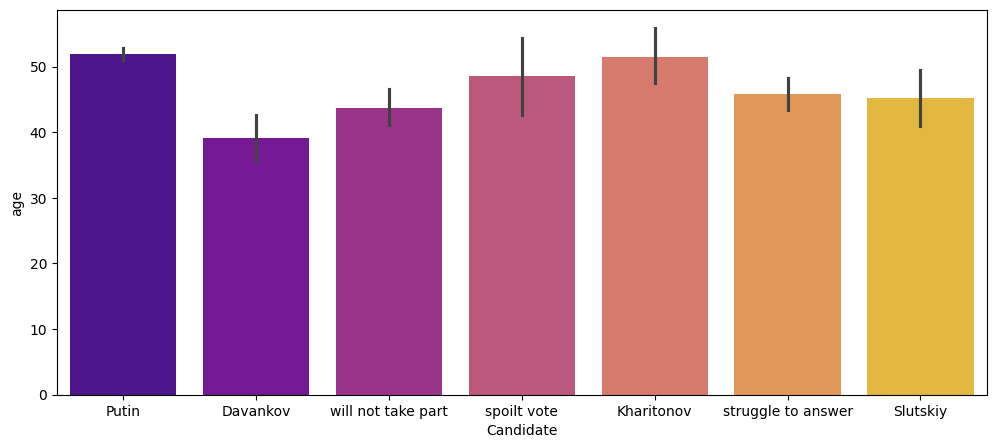

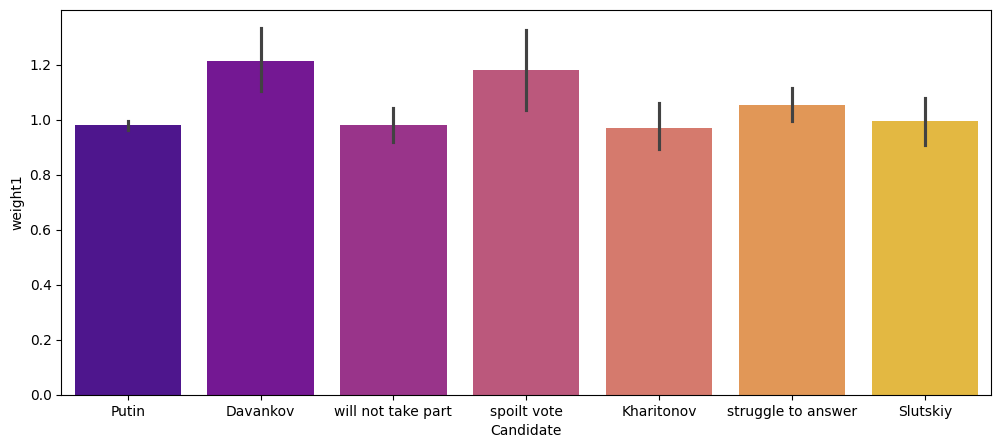

In [ ]:
for col in num_cols:
    plt.figure(figsize=(12,5))
    sns.barplot(x='candidate',y=col,data=df,palette='plasma')
    plt.xlabel('Candidate')
    plt.ylabel(col)
    plt.show()

In [ ]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
df['will_vote'].value_counts()

,count
will_vote,
definitely yes,1062
likely yes,218
not sure,166
definitely no,86
likely no,55
struggle to answer,13


In [ ]:
df.groupby('sex').agg({'will_vote':'value_counts'})

will_vote
sex    will_vote                    
female definitely yes            603
       likely yes                114
       not sure                   63
       definitely no              33
       likely no                  27
       struggle to answer          3
male   definitely yes            459
       likely yes                104
       not sure                  103
       definitely no              53
       likely no                  28
       struggle to answer         10

In [ ]:
df.groupby('candidate').agg({'will_vote':'value_counts'})

will_vote
candidate          will_vote                    
Davankov           definitely yes             47
                   likely yes                 13
                   not sure                    3
                   likely no                   2
                   struggle to answer          1
                   definitely no               1
Kharitonov         definitely yes             34
                   likely yes                 10
                   not sure                   10
                   definitely no               4
                   likely no                   3
                   struggle to answer          2
Putin              definitely yes            834
                   likely yes                147
                   not sure                   96
                   likely no                  23
                   definitely no              21
                   struggle to answer          7
Slutskiy           definitely yes             32
                   likely yes                 11
                   not sure                   10
                   likely no                   1
                   definitely no               1
spoilt vote        definitely yes             16
                   likely yes                  8
                   not sure                    2
                   likely no                   1
struggle to answer definitely yes             93
                   not sure                   37
                   likely yes                 26
                   definitely no               3
                   struggle to answer          3
                   likely no                   2
will not take part definitely no              56
                   likely no                  23
                   not sure                    8
                   definitely yes              6
                   likely yes                  3

In [ ]:
df.groupby('job_type').agg({'will_vote':'value_counts'})

will_vote
job_type                                will_vote                    
commercial organization                 definitely yes            871
                                        likely yes                194
                                        not sure                  144
                                        definitely no              81
                                        likely no                  50
                                        struggle to answer         13
government agency                       definitely yes            136
                                        likely yes                 12
                                        not sure                   12
                                        likely no                   2
                                        definitely no               1
government, management, judicial bodies definitely yes              7
hard to say                             definitely yes              8
                                        likely yes                  5
                                        not sure                    5
                                        likely no                   2
                                        definitely no               2
law enforcement agency                  definitely yes             26
                                        likely yes                  3
                                        definitely no               2
                                        not sure                    2
non-profit agency                       definitely yes             14
                                        likely yes                  4
                                        not sure                    3
                                        likely no                   1

In [ ]:
df.groupby('company_type').agg({'will_vote':'value_counts'})

will_vote
company_type                                       will_vote                    
catering, restaurants                              definitely yes             11
                                                   likely yes                  6
                                                   not sure                    4
                                                   definitely no               3
                                                   struggle to answer          1
...                                                                          ...
Сфера услуг, сервиса, бытового обслуживания Вкл... definitely yes             40
                                                   likely yes                 12
                                                   not sure                    8
                                                   likely no                   6
                                                   definitely no               4

[91 rows x 1 columns]

In [ ]:
df.groupby('internet_usage').agg({'will_vote':'value_counts'})

will_vote
internet_usage          will_vote                    
does not use internet   definitely yes            193
                        likely yes                 26
                        not sure                   18
                        definitely no              13
                        likely no                   6
                        struggle to answer          3
less than 4 hours a day definitely yes            414
                        likely yes                 96
                        not sure                   52
                        definitely no              30
                        likely no                  16
                        struggle to answer          5
once half a year        definitely yes             14
                        not sure                    2
                        likely yes                  2
over 4 hours a day      definitely yes            351
                        likely yes                 80
                        not sure                   74
                        definitely no              38
                        likely no                  31
                        struggle to answer          2
several times a month   definitely yes             18
                        definitely no               3
                        not sure                    3
                        likely yes                  2
                        struggle to answer          1
several times a week    definitely yes             72
                        not sure                   17
                        likely yes                 12
                        definitely no               2
                        likely no                   2
                        struggle to answer          2

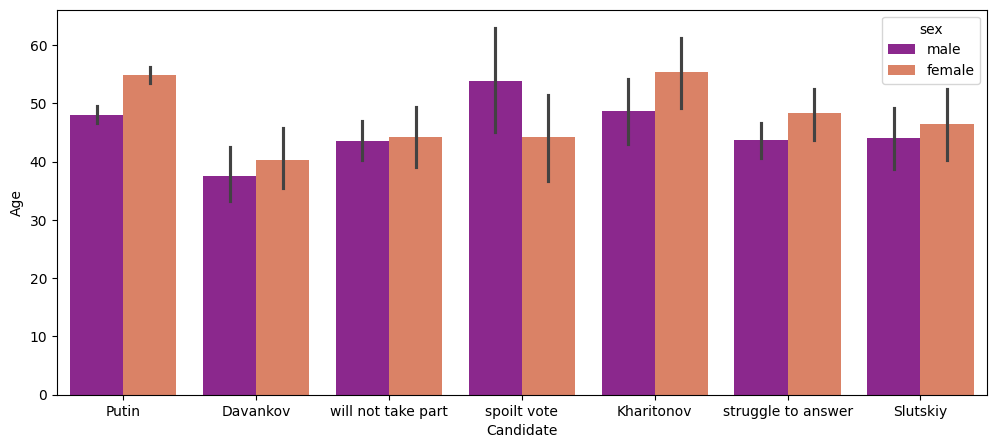

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='candidate',y='age',hue='sex',data=df,palette='plasma')
plt.xlabel('Candidate')
plt.ylabel('Age')
plt.show()

In [ ]:
df.columns

Index(['sex', 'age', 'federal_district', 'type_of_city', 'knows_election_date',
       'will_vote', 'candidate', 'television_usage', 'internet_usage',
       'education', 'income', 'employment', 'job_type', 'company_type',
       'weight1'],
      dtype='object')

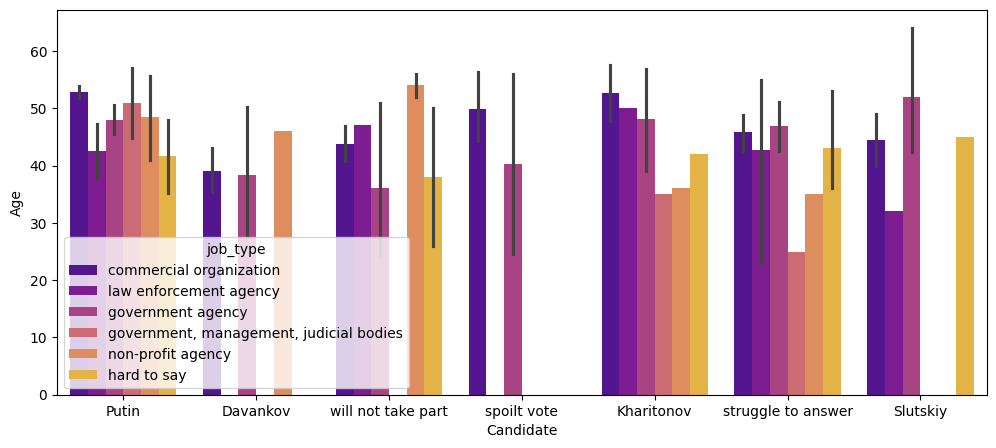

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='candidate',y='age',hue='job_type',data=df,palette='plasma')
plt.xlabel('Candidate')
plt.ylabel('Age')
plt.show()

In [ ]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,commercial organization,farming,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,commercial organization,"industry, manufacturing",1.538628
4,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
